In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [2]:
master = pd.read_csv('data/crimes_nat_tinker.csv')
master.drop(['Unnamed: 0','Unnamed: 0.1','SHOOTING'],axis=1,inplace=True)
master = pd.get_dummies(master, columns=['DAY_OF_WEEK'])
master.neighborhood_avg = np.log(master.neighborhood_avg)
master.closest_property_value = np.log(master.closest_property_value)
master.head()

,Lat,Long,MONTH,HOUR,TAVG,PRCP,SNOW,closest_property_value,neighborhood_avg,lamp_min_dist,lamp_density,category,police_min_dist,police_density,hospital_min_dist,hospital_density,school_min_dist,school_density,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,42.259518,-71.121563,10,9,59.0,0.00,0.0,13.025852,12.996051,0.001234,563.0,theft,0.004067,1.0,0.041388,0.0,0.004665,4.0,0,0,0,1,0,0,0
1,42.262092,-71.116710,10,20,56.0,0.01,0.0,13.201729,13.023400,0.000539,531.0,theft,0.009414,1.0,0.036018,0.0,0.001244,3.0,0,0,1,0,0,0,0
2,42.352375,-71.135096,10,15,56.0,0.01,0.0,12.468052,13.287047,0.000167,1272.0,theft,0.015767,0.0,0.010692,0.0,0.002624,3.0,0,0,1,0,0,0,0
3,42.349476,-71.076402,10,4,56.0,0.01,0.0,13.106234,14.326388,0.000074,4461.0,theft,0.012329,0.0,0.012304,0.0,0.001918,6.0,0,0,1,0,0,0,0
4,42.381846,-71.066551,10,8,71.0,0.22,0.0,13.637460,13.313802,0.000108,2672.0,theft,0.011801,0.0,0.016170,0.0,0.002848,3.0,0,0,0,0,0,0,1


In [3]:
X, y = master.drop(['category'], axis=1), master['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
def calc_meanstd(X_train, y_train, depths):

    # store output variables
    cvmeans      = []
    cvstds       = []
    train_scores = []
    
    # test different tree depths
    for depth in depths:
        
        print("Depth " + str(depth) + " ...")
        
        # create model
        rf = RandomForestClassifier(max_depth=depth)
        
        # use k=5 cross validation to evaluate performance
        cv_scores = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)
        
        # store mean and std of cv scores
        cvmeans.append(np.mean(cv_scores))
        cvstds.append(np.std(cv_scores))
    
        # evaluate performance on training set
        rf.fit(X_train,y_train)
        y_pred_train = rf.predict(X_train)
        acc_score_train = accuracy_score(y_pred_train, y_train)
        train_scores.append(acc_score_train)
    
    # end of your code here
    return cvmeans, cvstds, train_scores

In [7]:
depths = list(range(10, 26))

cvmeans, cvstds, train_scores = calc_meanstd(X_train, y_train, depths)

Depth 10 ...
Depth 11 ...
Depth 12 ...
Depth 13 ...
Depth 14 ...
Depth 15 ...
Depth 16 ...
Depth 17 ...
Depth 18 ...
Depth 19 ...
Depth 20 ...
Depth 21 ...
Depth 22 ...
Depth 23 ...
Depth 24 ...
Depth 25 ...


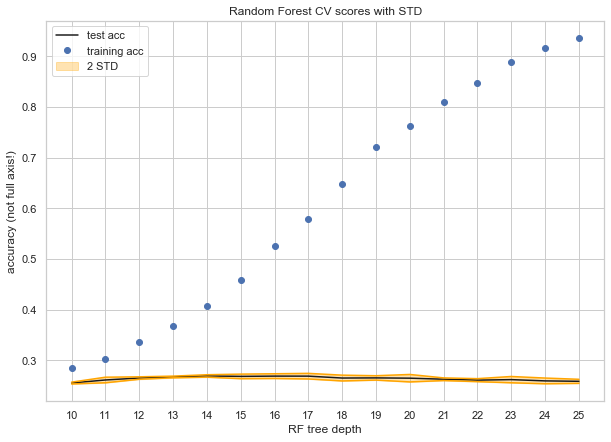

In [13]:
# initialize figure
fig = plt.figure(figsize=(10,7))

# get data for mean +/- 2std
stdabove = np.array(cvmeans) + 2*np.array(cvstds)
stdbelow = np.array(cvmeans) - 2*np.array(cvstds)

# plot cvmeans and cvstds
plt.plot(cvmeans,'k',label='test acc')
plt.plot(stdabove,'orange')
plt.plot(stdbelow,'orange')

# fill in between space
plt.fill_between(range(len(cvmeans)),stdbelow,stdabove,color='orange',alpha=.3,label='2 STD')

# plot training scores
plt.plot(train_scores,'o',label='training acc')

# plot formatting
plt.title('Random Forest CV scores with STD')
plt.xlabel('RF tree depth')
# plt.ylim(0.54,0.7) # can set the y-axis to focus on the cross-validation performance
plt.xticks(range(len(depths)),depths)
plt.ylabel('accuracy (not full axis!)')
plt.legend()
plt.show()